## Descripción General del Dataset VinDr-Mammo

**Origen y Contexto**: VinDr-Mammo es un conjunto de datos de mamografía digital desarrollado en Vietnam, diseñado para apoyar el diagnóstico asistido por computadora (CADx y CADe) en la detección del cáncer de mama. Este dataset tiene como objetivo mejorar la diversidad de los datos de mamografía disponibles públicamente y proporcionar una base sólida para el desarrollo de sistemas de inteligencia artificial en radiología mamaria.

**Tamaño y Composición**: El conjunto de datos consta de 5,000 exámenes de mamografía, cada uno con cuatro vistas estándar (craneocaudal - CC y oblicuo mediolateral - MLO para cada mama), lo que da un total de 20,000 imágenes. Estas imágenes fueron recopiladas de manera retrospectiva de dos hospitales en Hanoi, Vietnam. 

**Anotaciones**: Las imágenes han sido anotadas a nivel de mama y de lesión. Las anotaciones incluyen evaluaciones BI-RADS, categorías de densidad mamaria, y hallazgos específicos como masas, calcificaciones, asimetrías y distorsiones arquitectónicas. Las anotaciones fueron realizadas por radiólogos con experiencia, y en caso de discrepancia entre dos radiólogos, se resolvieron mediante la participación de un tercer radiólogo.

**Evaluación y División de Datos**: El dataset está dividido en un conjunto de entrenamiento con 4,000 exámenes y un conjunto de prueba con 1,000 exámenes. Esta división se realizó para asegurar una correcta estratificación de las características relevantes (BI-RADS, composición mamaria, y hallazgos).

**Acceso y Disponibilidad**: El conjunto de datos está disponible públicamente a través de la plataforma PhysioNet, y las anotaciones están estructuradas en archivos CSV que facilitan el análisis y procesamiento de los datos.

## Proceso de Creación del Dataset

1. **Adquisición de Datos**: Las imágenes fueron obtenidas en formato DICOM y pseudonimizadas para proteger la privacidad del paciente. Se eliminaron todas las informaciones identificables del paciente utilizando scripts de Python.

2. **Lectura y Anotación**: Las imágenes fueron revisadas y anotadas por radiólogos utilizando una herramienta de anotación web específica, llamada VinDr Lab.

3. **Estratificación y División de Datos**: Los exámenes anotados se dividieron en un conjunto de entrenamiento y uno de prueba utilizando un algoritmo de estratificación iterativa, para garantizar una distribución representativa de las características de interés.


![Proceso Creación de los Datos](imagenes/1.png)



## Características Adicionales

- **Diversidad del Dataset**: VinDr-Mammo representa una de las bases de datos públicas más grandes y diversas de mamografía digital de campo completo, con datos de una población vietnamita. Es particularmente valioso para la investigación en entornos de inteligencia artificial, debido a la detallada y extensa anotación de las imágenes.

- **Objetivo del Dataset**: Facilitar el desarrollo y evaluación de herramientas CADe/x para mejorar la precisión en la interpretación de mamografías, especialmente en la detección del cáncer de mama.


In [10]:
# Carga de Datos

# Importación de Librerías
import os
import pandas as pd

# Definir la ruta a la carpeta donde se encuentra el dataset
ruta_vindr = '/Volumes/m2/Memoria/Datasets/vindr'

# Leer archivos CSV
breast_level_annotations = pd.read_csv(os.path.join(ruta_vindr, 'breast-level_annotations.csv'))
finding_annotations = pd.read_csv(os.path.join(ruta_vindr, 'finding_annotations.csv'))
metadata = pd.read_csv(os.path.join(ruta_vindr, 'metadata.csv'))

# Mostrar las primeras filas de cada CSV para verificar la carga correcta
print("Breast Level Annotations:")
display(breast_level_annotations.head())

print("\nFinding Annotations:")
display(finding_annotations.head())

print("\nMetadata:")
display(metadata.head())

# Cargar las imágenes
ruta_imagenes = os.path.join(ruta_vindr, 'images')
lista_imagenes = os.listdir(ruta_imagenes)

# Mostrar un resumen de las imágenes disponibles
print(f"\nNúmero de imágenes en la carpeta 'images': {len(lista_imagenes)}")
print(f"Ejemplo de nombres de imágenes: {lista_imagenes[:5]}")


Breast Level Annotations:


,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,split
0,b8d273e8601f348d3664778dae0e7e0b,b36517b9cbbcfd286a7ae04f643af97a,d8125545210c08e1b1793a5af6458ee2,L,CC,3518,2800,BI-RADS 2,DENSITY C,training
1,b8d273e8601f348d3664778dae0e7e0b,b36517b9cbbcfd286a7ae04f643af97a,290c658f4e75a3f83ec78a847414297c,L,MLO,3518,2800,BI-RADS 2,DENSITY C,training
2,b8d273e8601f348d3664778dae0e7e0b,b36517b9cbbcfd286a7ae04f643af97a,cd0fc7bc53ac632a11643ac4cc91002a,R,CC,3518,2800,BI-RADS 2,DENSITY C,training
3,b8d273e8601f348d3664778dae0e7e0b,b36517b9cbbcfd286a7ae04f643af97a,71638b1e853799f227492bfb08a01491,R,MLO,3518,2800,BI-RADS 2,DENSITY C,training
4,8269f5971eaca3e5d3772d1796e6bd7a,d931832a0815df082c085b6e09d20aac,dd9ce3288c0773e006a294188aadba8e,L,CC,3518,2800,BI-RADS 1,DENSITY C,training



Finding Annotations:


,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_categories,finding_birads,xmin,ymin,xmax,ymax,split
0,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,4e3a578fe535ea4f5258d3f7f4419db8,R,CC,3518,2800,BI-RADS 4,DENSITY C,['Mass'],BI-RADS 4,2355.139893,1731.640015,2482.979980,1852.750000,training
1,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,dac39351b0f3a8c670b7f8dc88029364,R,MLO,3518,2800,BI-RADS 4,DENSITY C,['Mass'],BI-RADS 4,2386.679932,1240.609985,2501.800049,1354.040039,training
2,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,c83f780904f25eacb44e9030f32c66e1,R,CC,3518,2800,BI-RADS 3,DENSITY C,['Global Asymmetry'],BI-RADS 3,2279.179932,1166.510010,2704.439941,2184.260010,training
3,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,893528bc38a0362928a89364f1b692fd,R,MLO,3518,2800,BI-RADS 3,DENSITY C,['Global Asymmetry'],BI-RADS 3,1954.270020,1443.640015,2589.760010,2193.810059,training
4,c3487424fee1bdd4515b72dc3fd69813,77619c914263eae44e9099f1ce07192c,318264c881bf12f2c1efe5f93920cc37,R,CC,3518,2800,BI-RADS 4,DENSITY C,['Architectural Distortion'],BI-RADS 4,2172.300049,1967.410034,2388.699951,2147.159912,training



Metadata:


,SOP Instance UID,Series Instance UID,SOP Instance UID.1,Patient's Age,View Position,Image Laterality,Photometric Interpretation,Rows,Columns,Imager Pixel Spacing,...,Pixel Padding Value,Pixel Padding Range Limit,Window Center,Window Width,Rescale Intercept,Rescale Slope,Rescale Type,Window Center & Width Explanation,Manufacturer,Manufacturer's Model Name
0,d8125545210c08e1b1793a5af6458ee2,b36517b9cbbcfd286a7ae04f643af97a,d8125545210c08e1b1793a5af6458ee2,053Y,CC,L,MONOCHROME2,3518,2800,"[0.085, 0.085]",...,0,NaN,1662,1500,0,1,US,linear LUT,SIEMENS,Mammomat Inspiration
1,290c658f4e75a3f83ec78a847414297c,b36517b9cbbcfd286a7ae04f643af97a,290c658f4e75a3f83ec78a847414297c,053Y,MLO,L,MONOCHROME2,3518,2800,"[0.085, 0.085]",...,0,NaN,1664,1500,0,1,US,linear LUT,SIEMENS,Mammomat Inspiration
2,cd0fc7bc53ac632a11643ac4cc91002a,b36517b9cbbcfd286a7ae04f643af97a,cd0fc7bc53ac632a11643ac4cc91002a,053Y,CC,R,MONOCHROME2,3518,2800,"[0.085, 0.085]",...,0,NaN,1600,1500,0,1,US,linear LUT,SIEMENS,Mammomat Inspiration
3,71638b1e853799f227492bfb08a01491,b36517b9cbbcfd286a7ae04f643af97a,71638b1e853799f227492bfb08a01491,053Y,MLO,R,MONOCHROME2,3518,2800,"[0.085, 0.085]",...,0,NaN,1654,1500,0,1,US,linear LUT,SIEMENS,Mammomat Inspiration
4,dd9ce3288c0773e006a294188aadba8e,d931832a0815df082c085b6e09d20aac,dd9ce3288c0773e006a294188aadba8e,042Y,CC,L,MONOCHROME2,3518,2800,"[0.085, 0.085]",...,0,NaN,1580,1500,0,1,US,linear LUT,SIEMENS,Mammomat Inspiration



Número de imágenes en la carpeta 'images': 5001
Ejemplo de nombres de imágenes: ['94b8aa8d440fd53eeaba90c90fd7c5a8', 'fcc67ac333b35f981f75ac4ee37bcd23', 'f58ee75d530001771356090077eedbfe', '60c8177e1f4f489c8e14ad6804f8579a', '5a77087143733dea136bff7114889710']


### Metadata.csv

Error: El archivo '/mnt/data/metadata.csv' no se encontró.

Primeras filas del dataset:


,SOP Instance UID,Series Instance UID,SOP Instance UID.1,Patient's Age,View Position,Image Laterality,Photometric Interpretation,Rows,Columns,Imager Pixel Spacing,...,Pixel Padding Value,Pixel Padding Range Limit,Window Center,Window Width,Rescale Intercept,Rescale Slope,Rescale Type,Window Center & Width Explanation,Manufacturer,Manufacturer's Model Name
0,d8125545210c08e1b1793a5af6458ee2,b36517b9cbbcfd286a7ae04f643af97a,d8125545210c08e1b1793a5af6458ee2,053Y,CC,L,MONOCHROME2,3518,2800,"[0.085, 0.085]",...,0,NaN,1662,1500,0,1,US,linear LUT,SIEMENS,Mammomat Inspiration
1,290c658f4e75a3f83ec78a847414297c,b36517b9cbbcfd286a7ae04f643af97a,290c658f4e75a3f83ec78a847414297c,053Y,MLO,L,MONOCHROME2,3518,2800,"[0.085, 0.085]",...,0,NaN,1664,1500,0,1,US,linear LUT,SIEMENS,Mammomat Inspiration
2,cd0fc7bc53ac632a11643ac4cc91002a,b36517b9cbbcfd286a7ae04f643af97a,cd0fc7bc53ac632a11643ac4cc91002a,053Y,CC,R,MONOCHROME2,3518,2800,"[0.085, 0.085]",...,0,NaN,1600,1500,0,1,US,linear LUT,SIEMENS,Mammomat Inspiration
3,71638b1e853799f227492bfb08a01491,b36517b9cbbcfd286a7ae04f643af97a,71638b1e853799f227492bfb08a01491,053Y,MLO,R,MONOCHROME2,3518,2800,"[0.085, 0.085]",...,0,NaN,1654,1500,0,1,US,linear LUT,SIEMENS,Mammomat Inspiration
4,dd9ce3288c0773e006a294188aadba8e,d931832a0815df082c085b6e09d20aac,dd9ce3288c0773e006a294188aadba8e,042Y,CC,L,MONOCHROME2,3518,2800,"[0.085, 0.085]",...,0,NaN,1580,1500,0,1,US,linear LUT,SIEMENS,Mammomat Inspiration



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SOP Instance UID                   20000 non-null  object 
 1   Series Instance UID                20000 non-null  object 
 2   SOP Instance UID.1                 20000 non-null  object 
 3   Patient's Age                      17740 non-null  object 
 4   View Position                      20000 non-null  object 
 5   Image Laterality                   20000 non-null  object 
 6   Photometric Interpretation         20000 non-null  object 
 7   Rows                               20000 non-null  int64  
 8   Columns                            20000 non-null  int64  
 9   Imager Pixel Spacing               20000 non-null  object 
 10  Pixel Spacing                      3872 non-null   object 
 11  Pixel Padding Value         

None


Resumen estadístico de las columnas numéricas:


,Rows,Columns,Pixel Padding Value,Pixel Padding Range Limit,Rescale Intercept,Rescale Slope
count,20000.000000,20000.000000,20000.000000,960.000000,20000.0,20000.0
mean,3386.977200,2647.476500,1898.000000,3074.763542,0.0,1.0
std,278.611866,308.275842,3921.525841,1900.710503,0.0,0.0
min,2812.000000,2012.000000,0.000000,294.000000,0.0,1.0
25%,3518.000000,2800.000000,0.000000,1437.000000,0.0,1.0
50%,3518.000000,2800.000000,0.000000,3034.000000,0.0,1.0
75%,3518.000000,2800.000000,0.000000,4548.500000,0.0,1.0
max,3580.000000,2812.000000,10000.000000,7419.000000,0.0,1.0



Valores nulos por columna:
SOP Instance UID                         0
Series Instance UID                      0
SOP Instance UID.1                       0
Patient's Age                         2260
View Position                            0
Image Laterality                         0
Photometric Interpretation               0
Rows                                     0
Columns                                  0
Imager Pixel Spacing                     0
Pixel Spacing                        16128
Pixel Padding Value                      0
Pixel Padding Range Limit            19040
Window Center                            0
Window Width                             0
Rescale Intercept                        0
Rescale Slope                            0
Rescale Type                             0
Window Center & Width Explanation        0
Manufacturer                             0
Manufacturer's Model Name                0
dtype: int64

Cantidad de valores únicos por columna:
SOP Instance UI

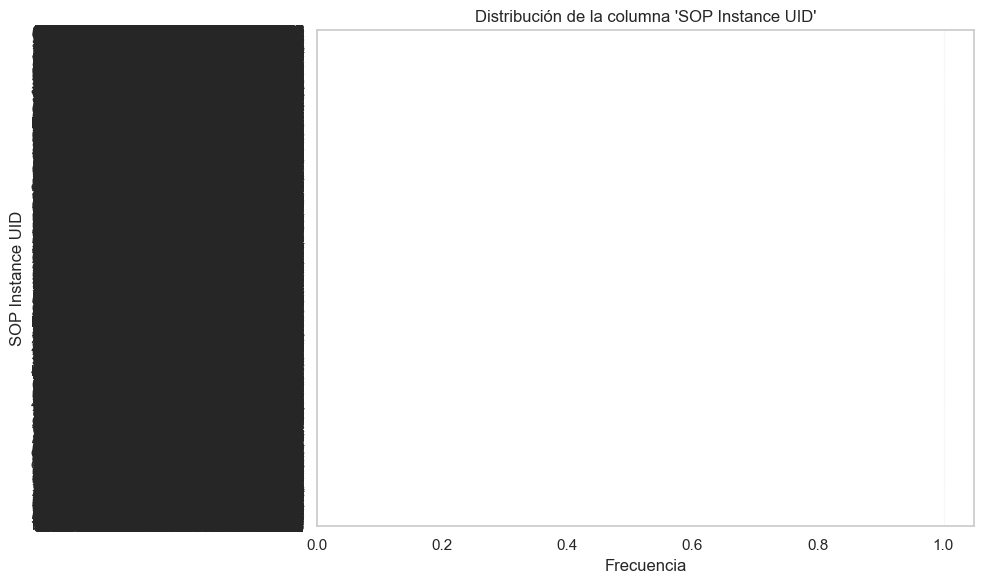


Distribución de la columna 'Series Instance UID':
Series Instance UID
b36517b9cbbcfd286a7ae04f643af97a    4
2cea95f539db9fc86e7ec41436871750    4
b442feebb975eba9e78fbd0a665d19d5    4
68dc16407c0b14c2b792bbb4df24108f    4
19419aebf8ae999664caf504095e343a    4
                                   ..
3153c4dce2a4a47f8d9d05a54abdb7bb    1
d701ea42302215d0ed0473addd8c2661    1
3704207e1b40779cca4d3de6c66b186b    1
269abeb40abfed98efdc989e265f5554    1
4d5cd439ec4086fe12548d97508c21ea    1
Name: count, Length: 5036, dtype: int64


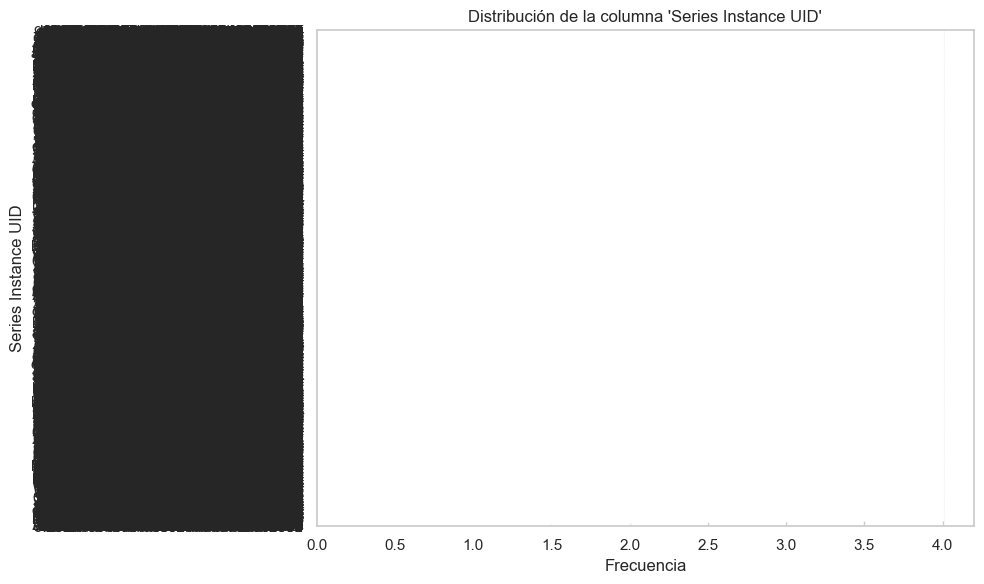


Distribución de la columna 'SOP Instance UID.1':
SOP Instance UID.1
d8125545210c08e1b1793a5af6458ee2    1
9d789f15004264385292c58904c46253    1
b12c86c822f6e4234818106ecbe103d5    1
db1411a6e92a86bd56fdae9f957f1baa    1
b80ade4c2441a78388bc86d7cb25898e    1
                                   ..
2edb4c9de17ab51b39fd3475472aa22f    1
1c48c120b17cc6f4ca448a373d62258a    1
3b5c6eac548e15d0cf143c8d9e13efb1    1
005918369ec07b1aed37d1dd78bc57fe    1
45c1239cc36b0e672f0072707fd05c6f    1
Name: count, Length: 20000, dtype: int64


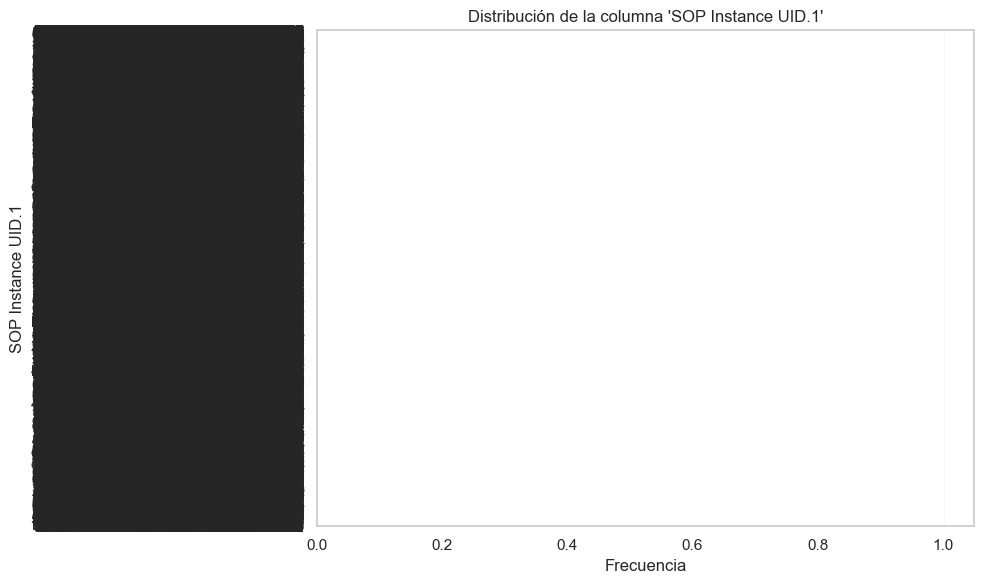


Distribución de la columna 'Patient's Age':
Patient's Age
045Y    804
044Y    800
042Y    796
043Y    768
047Y    764
       ... 
087Y      4
083Y      4
015Y      4
077Y      4
088Y      4
Name: count, Length: 73, dtype: int64


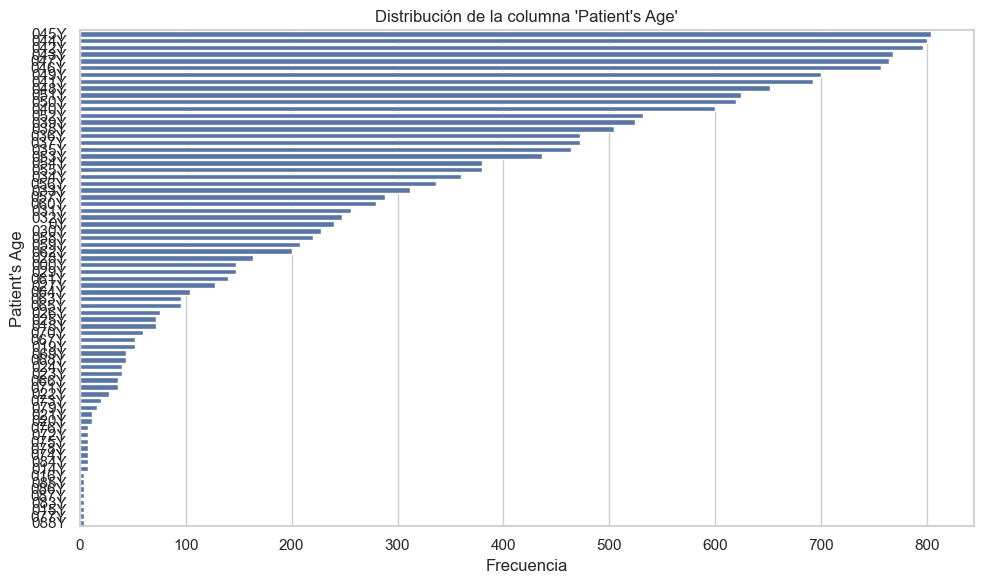


Distribución de la columna 'View Position':
View Position
CC     10001
MLO     9999
Name: count, dtype: int64


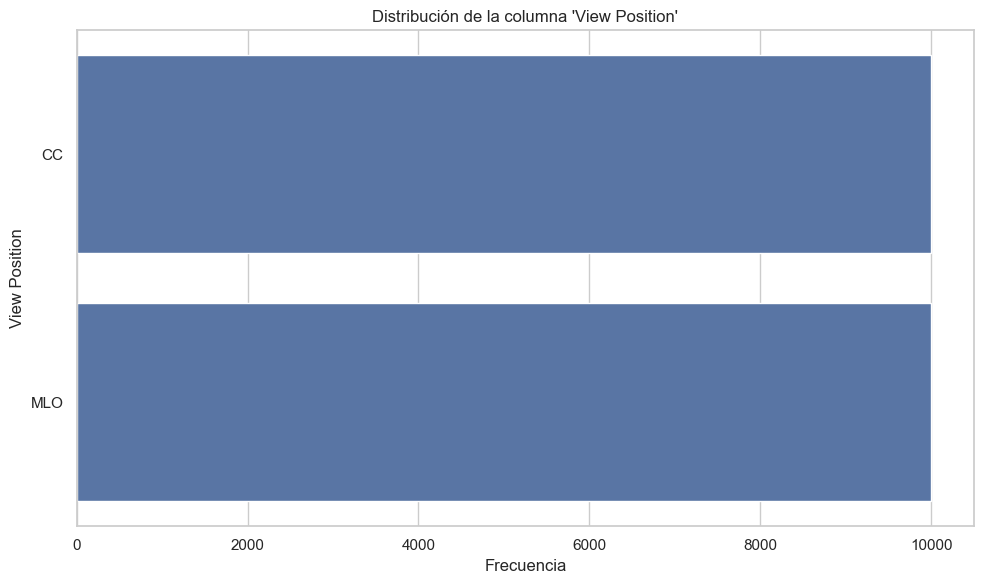


Distribución de la columna 'Image Laterality':
Image Laterality
L    10000
R    10000
Name: count, dtype: int64


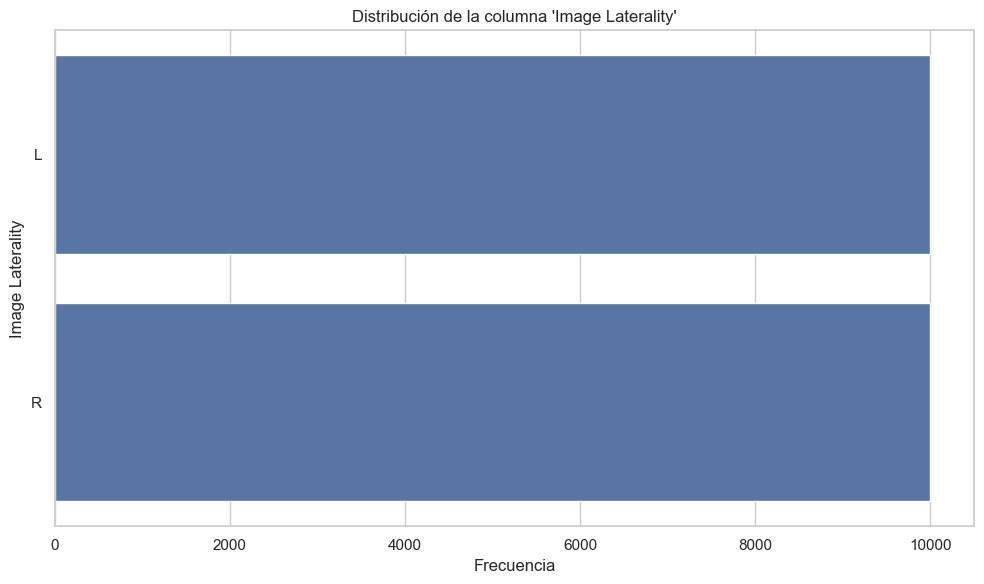


Distribución de la columna 'Photometric Interpretation':
Photometric Interpretation
MONOCHROME2    16204
MONOCHROME1     3796
Name: count, dtype: int64


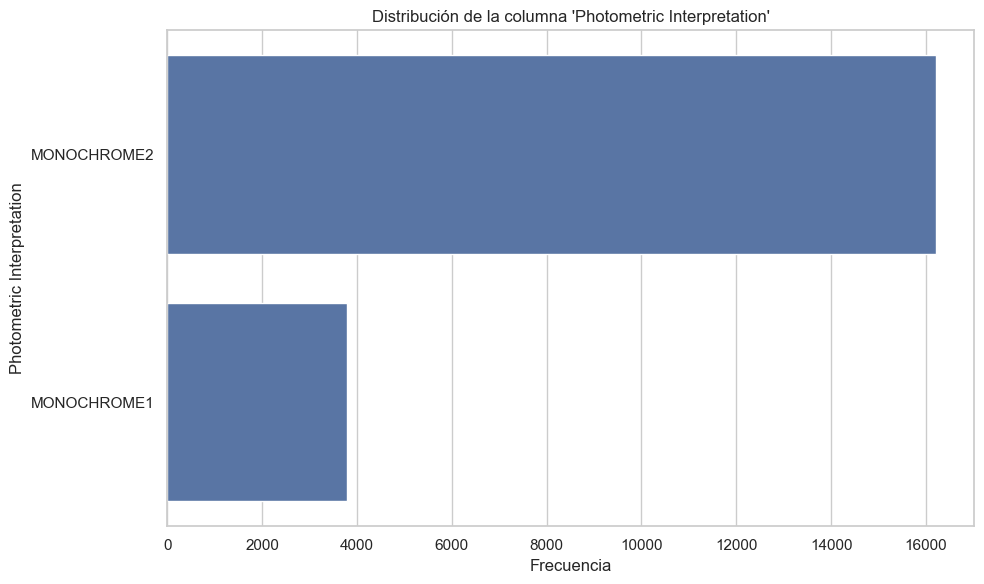


Distribución de la columna 'Imager Pixel Spacing':
Imager Pixel Spacing
[0.085, 0.085]      15244
[0.0850, 0.0850]     3796
[0.0828, 0.0828]      404
[0.0814, 0.0814]      332
[0.083, 0.083]        224
Name: count, dtype: int64


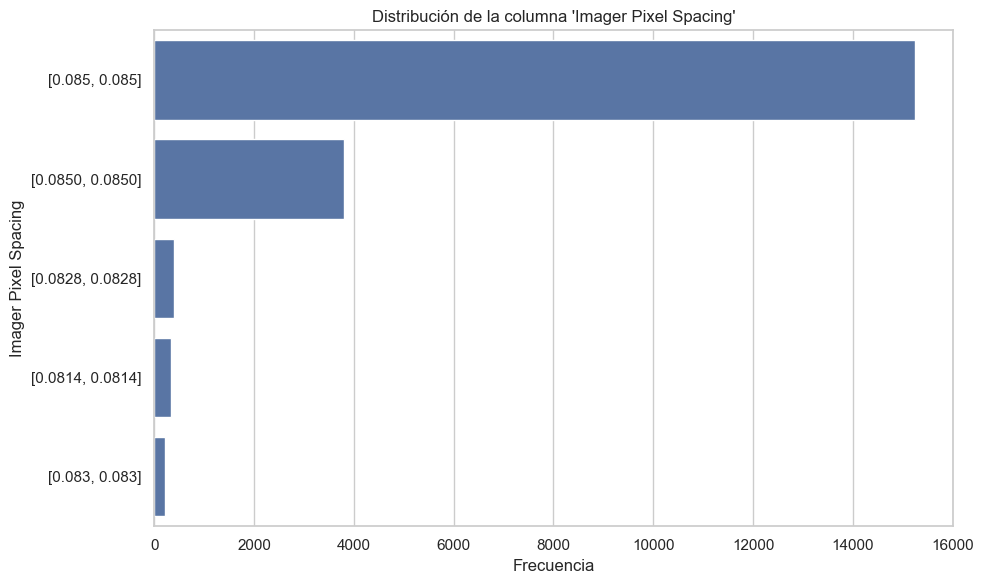


Distribución de la columna 'Pixel Spacing':
Pixel Spacing
[0.0850, 0.0850]    3796
[0.0828, 0.0828]      76
Name: count, dtype: int64


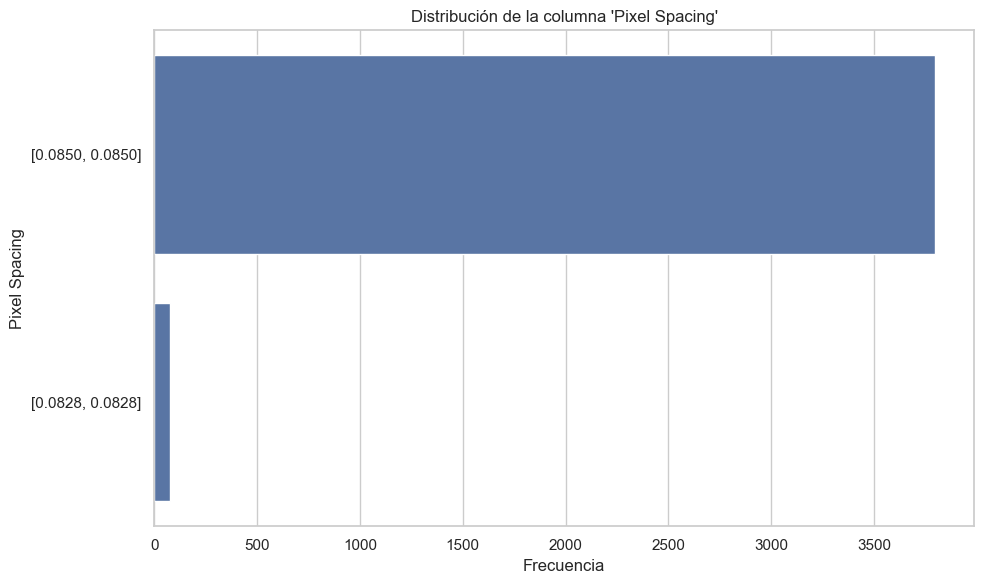


Distribución de la columna 'Window Center':
Window Center
1653                              192
1648                              176
1660                              171
1657                              169
1675                              166
                                 ... 
[8204, 8204, 8170, 8291, 8347]      1
[8573, 8573, 8540, 8657, 8711]      1
[8175, 8175, 8137, 8272, 8333]      1
[8639, 8639, 8602, 8733, 8793]      1
[8300, 8155, 8120, 8243, 8300]      1
Name: count, Length: 1325, dtype: int64


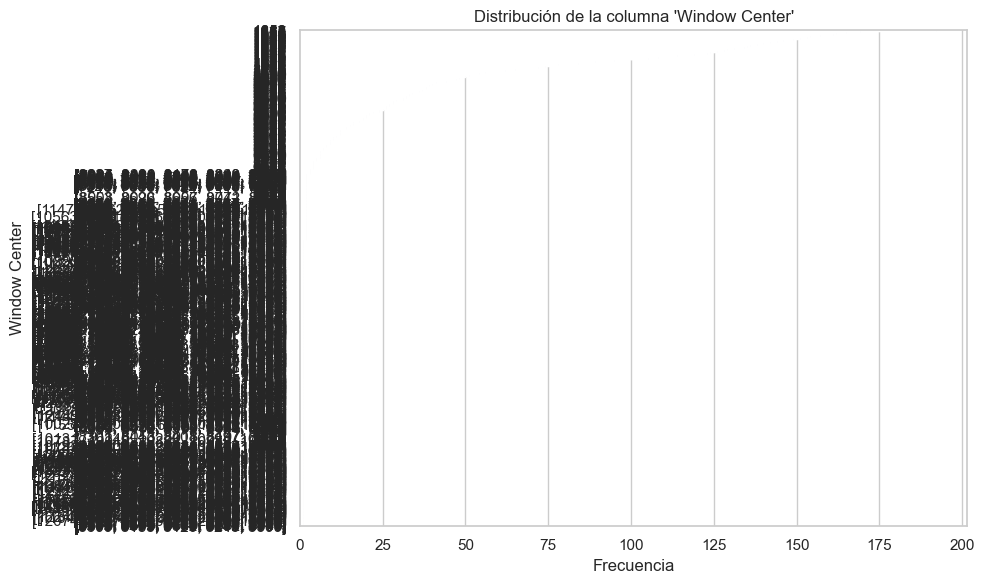


Distribución de la columna 'Window Width':
Window Width
1500                              15244
7296                                 65
7260                                 58
7284                                 56
7276                                 52
                                  ...  
[1928, 1928, 1735, 2120, 2120]        1
[1484, 1484, 1335, 1632, 1632]        1
[1657, 1657, 1491, 1822, 1822]        1
[1603, 1603, 1442, 1763, 1763]        1
[1845, 1758, 1582, 1933, 1845]        1
Name: count, Length: 943, dtype: int64


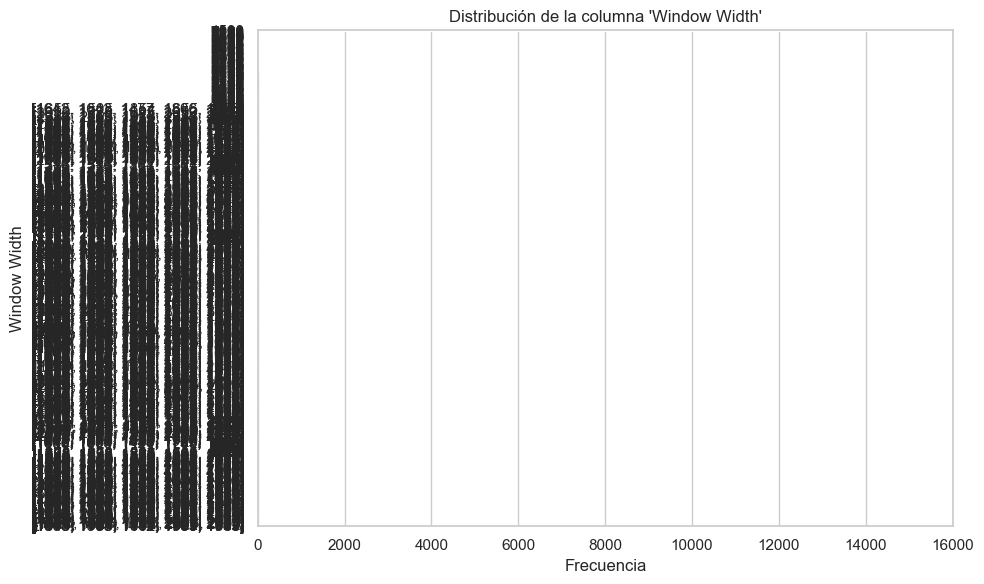


Distribución de la columna 'Rescale Type':
Rescale Type
US    20000
Name: count, dtype: int64


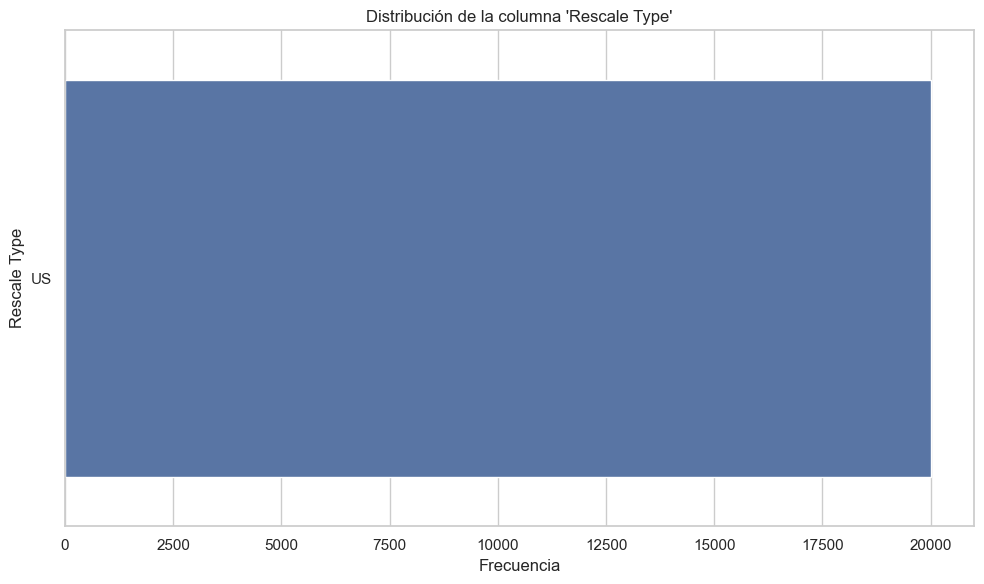


Distribución de la columna 'Window Center & Width Explanation':
Window Center & Width Explanation
linear LUT                                                 15244
Default W/L                                                 3796
['CURRENT', 'STANDARD', 'CONTRAST', 'SMOOTH', 'CUSTOM']      960
Name: count, dtype: int64


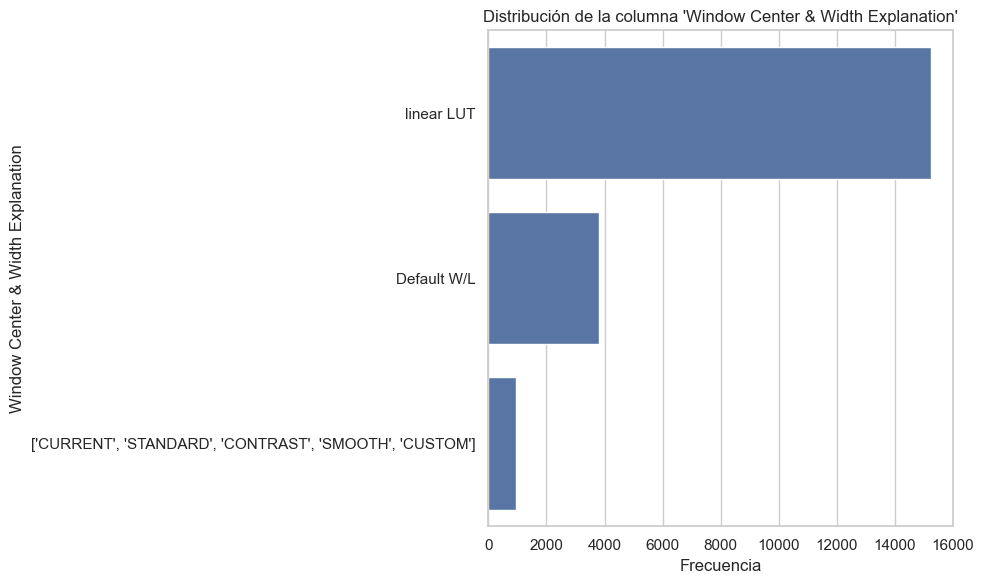


Distribución de la columna 'Manufacturer':
Manufacturer
SIEMENS              15244
Planmed               3796
IMS s.r.l.             736
IMS GIOTTO S.p.A.      224
Name: count, dtype: int64


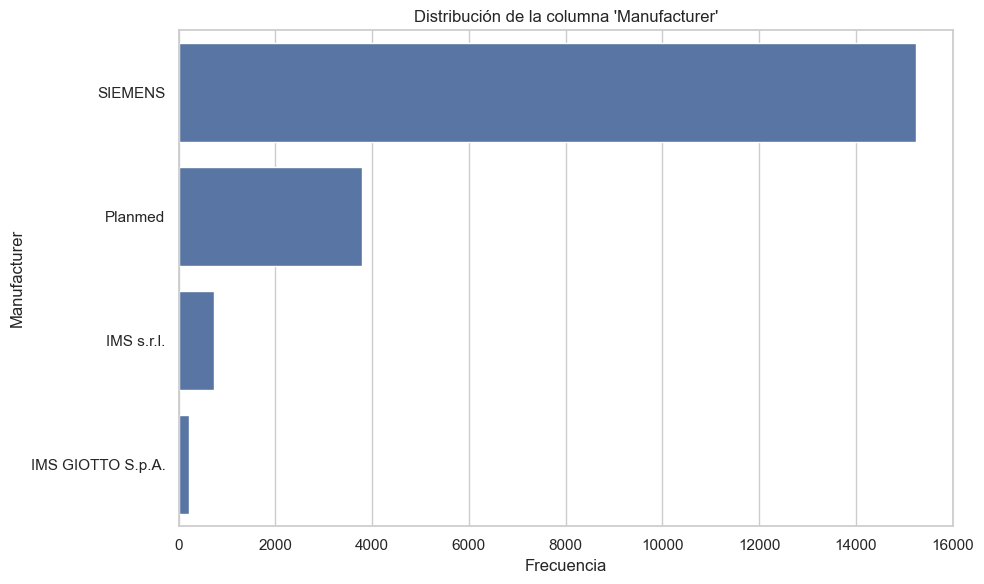


Distribución de la columna 'Manufacturer's Model Name':
Manufacturer's Model Name
Mammomat Inspiration    15244
Planmed Nuance           3796
GIOTTO CLASS              628
GIOTTO IMAGE 3DL          332
Name: count, dtype: int64


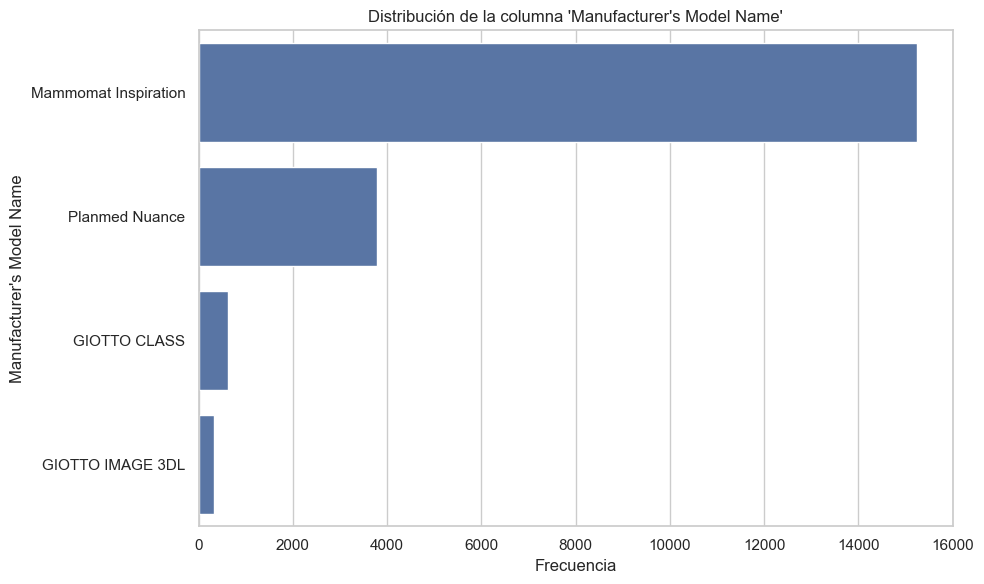

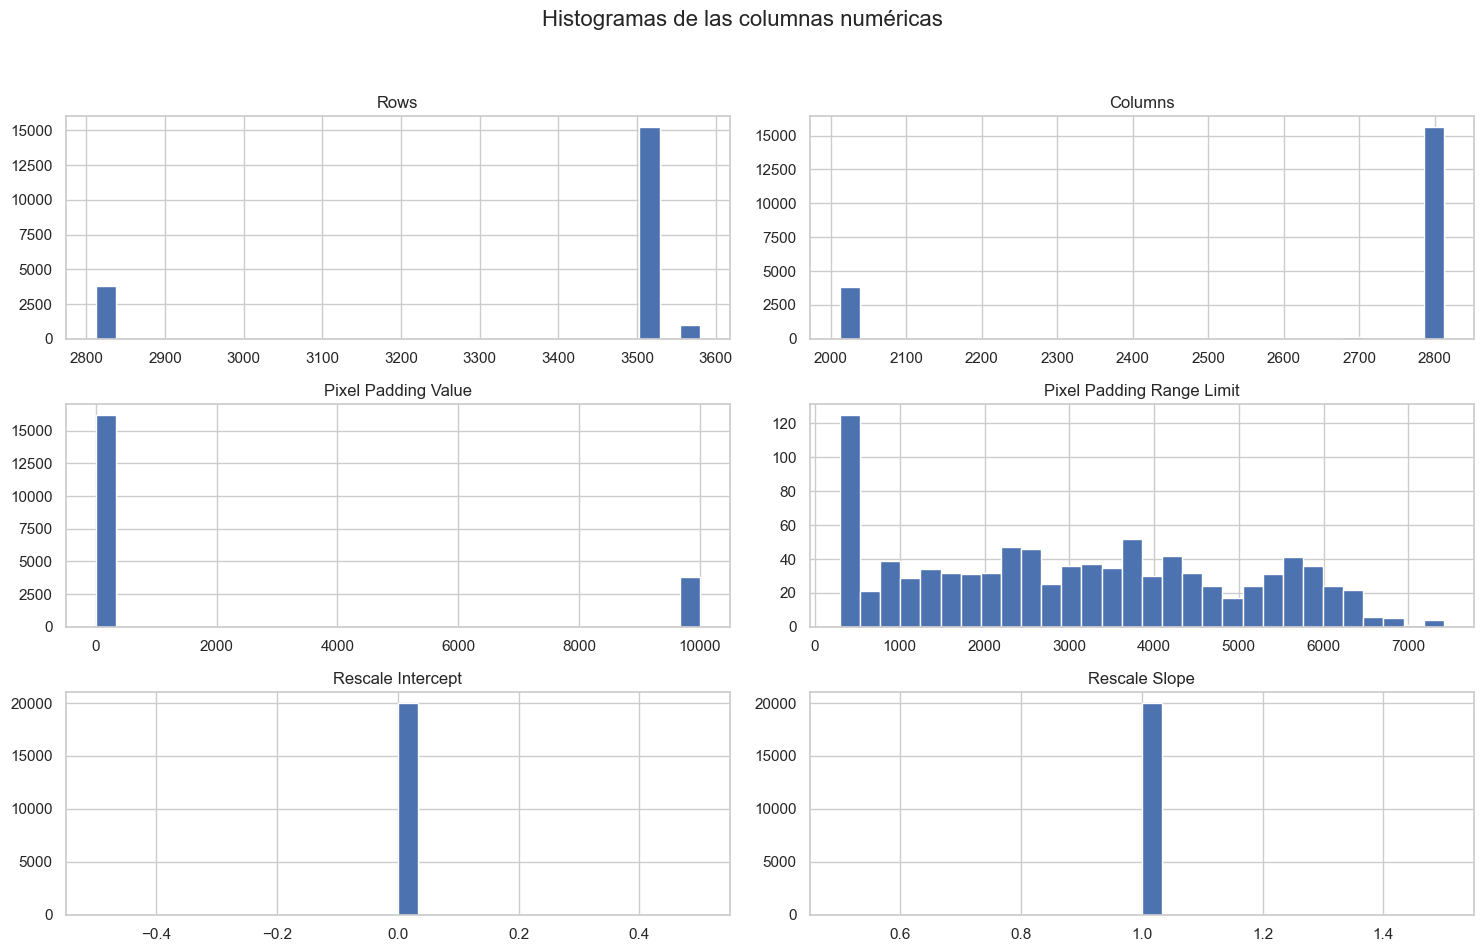

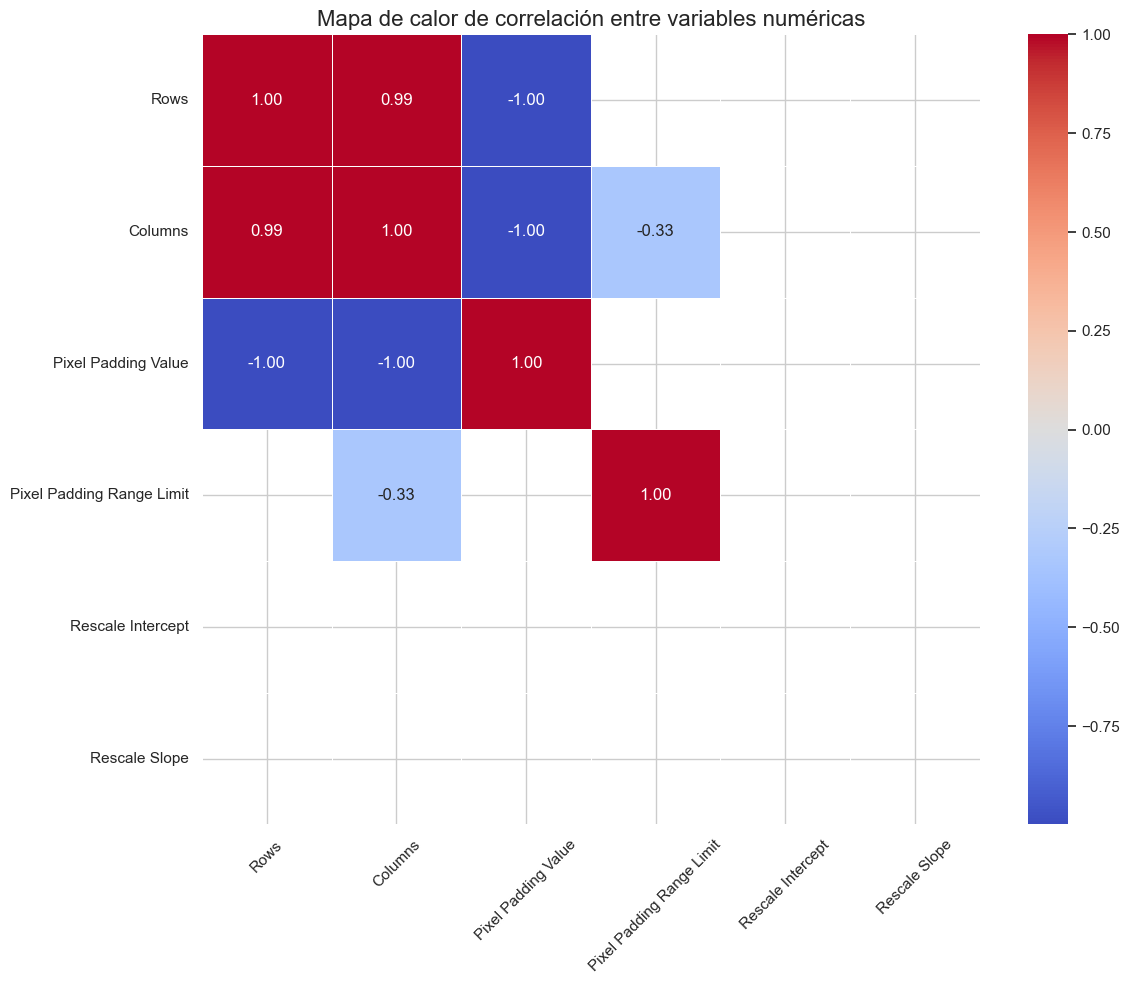


La columna 'column_name' no existe en el dataset.


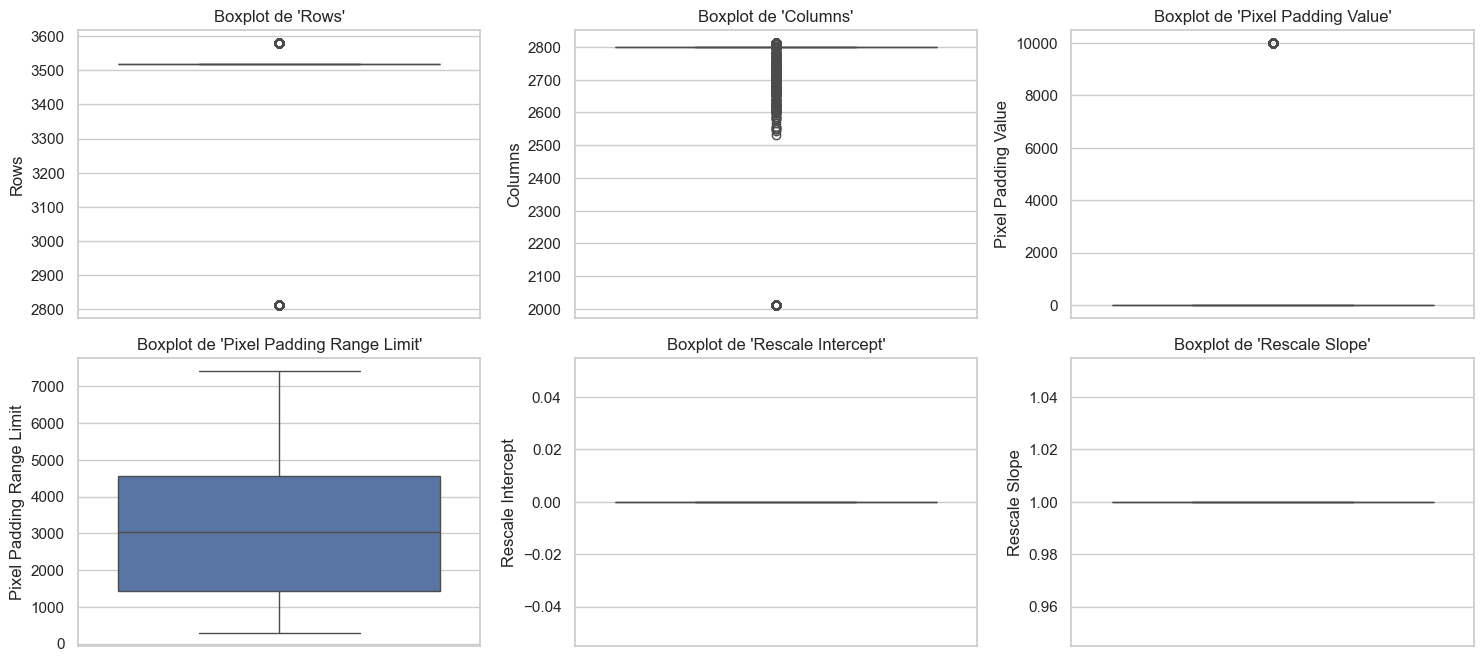

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para las gráficas
sns.set(style="whitegrid")

# 1. Cargar el Archivo CSV
ruta_metadata = '/Volumes/m2/Memoria/Datasets/vindr/metadata.csv'  # Reemplaza con la ruta correcta a tu archivo
try:
    metadata_df = pd.read_csv(ruta_metadata)
    print("Archivo 'metadata.csv' cargado exitosamente.")
except FileNotFoundError:
    print(f"Error: El archivo '{ruta_metadata}' no se encontró.")
    # Puedes decidir si salir del script o manejar el error de otra forma
    exit()

# Mostrar las primeras filas para tener una visión general del contenido
print("\nPrimeras filas del dataset:")
display(metadata_df.head())

# Resumen de la estructura del dataset (número de filas, columnas, tipos de datos)
print("\nInformación del dataset:")
display(metadata_df.info())

# Resumen estadístico de las columnas numéricas
print("\nResumen estadístico de las columnas numéricas:")
display(metadata_df.describe())

# 2. Análisis Exploratorio

# Revisar si hay valores nulos en el dataset
null_values = metadata_df.isnull().sum()
print("\nValores nulos por columna:")
print(null_values)

# Contar la cantidad de valores únicos por columna
unique_values = metadata_df.nunique()
print("\nCantidad de valores únicos por columna:")
print(unique_values)

# Mostrar la distribución de las variables categóricas
categorical_columns = metadata_df.select_dtypes(include=['object', 'category']).columns
print("\nDistribución de variables categóricas:")
for column in categorical_columns:
    print(f"\nDistribución de la columna '{column}':")
    print(metadata_df[column].value_counts())
    plt.figure(figsize=(10, 6))
    sns.countplot(data=metadata_df, y=column, order=metadata_df[column].value_counts().index)
    plt.title(f"Distribución de la columna '{column}'")
    plt.xlabel("Frecuencia")
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()

# 3. Visualización de los Datos

# Seleccionar sólo las columnas numéricas
numeric_columns = metadata_df.select_dtypes(include=['int64', 'float64']).columns
if numeric_columns.any():
    # Histograma de las columnas numéricas
    metadata_df[numeric_columns].hist(figsize=(15, 10), bins=30)
    plt.suptitle("Histogramas de las columnas numéricas", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # Mapa de calor para ver la correlación entre variables numéricas
    plt.figure(figsize=(12, 10))
    corr_matrix = metadata_df[numeric_columns].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title("Mapa de calor de correlación entre variables numéricas", fontsize=16)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("\nNo se encontraron columnas numéricas para generar histogramas y mapa de calor.")

# 4. Análisis Detallado de Columnas Específicas
# Aquí puedes reemplazar 'column_name' con el nombre de la columna que deseas analizar en detalle
column_to_analyze = 'column_name'  # Reemplaza con tu columna de interés

if column_to_analyze in metadata_df.columns:
    print(f"\nAnálisis detallado de la columna '{column_to_analyze}':")
    print(metadata_df[column_to_analyze].describe())
    
    plt.figure(figsize=(10, 6))
    if metadata_df[column_to_analyze].dtype in ['int64', 'float64']:
        sns.histplot(metadata_df[column_to_analyze], kde=True, bins=30)
        plt.title(f"Distribución de la columna numérica '{column_to_analyze}'")
        plt.xlabel(column_to_analyze)
        plt.ylabel("Frecuencia")
    else:
        sns.countplot(data=metadata_df, x=column_to_analyze, order=metadata_df[column_to_analyze].value_counts().index)
        plt.title(f"Distribución de la columna categórica '{column_to_analyze}'")
        plt.xlabel(column_to_analyze)
        plt.ylabel("Frecuencia")
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print(f"\nLa columna '{column_to_analyze}' no existe en el dataset.")

# 5. Identificación de Tendencias o Anomalías

# Detectar outliers en las columnas numéricas utilizando boxplots
if numeric_columns.any():
    plt.figure(figsize=(15, 10))
    for idx, column in enumerate(numeric_columns):
        plt.subplot(len(numeric_columns)//3 + 1, 3, idx+1)
        sns.boxplot(y=metadata_df[column])
        plt.title(f"Boxplot de '{column}'")
    plt.tight_layout()
    plt.show()
else:
    print("\nNo se encontraron columnas numéricas para generar boxplots y detectar outliers.")


### breast-level_annotations.csv 

In [1]:
import pandas as pd

# 1. Cargar el Archivo CSV
ruta_csv = '/Volumes/m2/Memoria/Datasets/vindr/breast-level_annotations.csv'
annotations_df = pd.read_csv(ruta_csv)

# 2. Conteo de valores en la columna 'laterality' (Lado de la mama: L o R)
laterality_counts = annotations_df['laterality'].value_counts()
print("Conteo de L y R en la columna 'laterality':")
print(laterality_counts)

# 3. Conteo de valores en la columna 'view_position' (Posición de la vista: CC o MLO)
view_position_counts = annotations_df['view_position'].value_counts()
print("\nConteo de CC y MLO en la columna 'view_position':")
print(view_position_counts)

# 4. Conteo de valores en la columna 'breast_density' (Densidad mamaria: A, B, C, D)
breast_density_counts = annotations_df['breast_density'].value_counts()
print("\nConteo de valores en la columna 'breast_density':")
print(breast_density_counts)

# 5. Conteo de valores en la columna 'split' (División en conjunto de entrenamiento y prueba: training o test)
split_counts = annotations_df['split'].value_counts()
print("\nConteo de valores en la columna 'split':")
print(split_counts)

# 6. Conteo de valores en la columna 'breast_birads' (Categoría BI-RADS: 1, 2, 3, 4, 5, etc.)
birads_counts = annotations_df['breast_birads'].value_counts()
print("\nConteo de valores en la columna 'breast_birads':")
print(birads_counts)


Conteo de L y R en la columna 'laterality':
laterality
L    10000
R    10000
Name: count, dtype: int64

Conteo de CC y MLO en la columna 'view_position':
view_position
CC     10001
MLO     9999
Name: count, dtype: int64

Conteo de valores en la columna 'breast_density':
breast_density
DENSITY C    15292
DENSITY D     2700
DENSITY B     1908
DENSITY A      100
Name: count, dtype: int64

Conteo de valores en la columna 'split':
split
training    16000
test         4000
Name: count, dtype: int64

Conteo de valores en la columna 'breast_birads':
breast_birads
BI-RADS 1    13406
BI-RADS 2     4676
BI-RADS 3      930
BI-RADS 4      762
BI-RADS 5      226
Name: count, dtype: int64


/var/folders/ds/4z7lc9ld4mqb377_3t2v4lxm0000gn/T/ipykernel_5154/2692154776.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=laterality_counts.index, y=laterality_counts.values, palette='Set2')


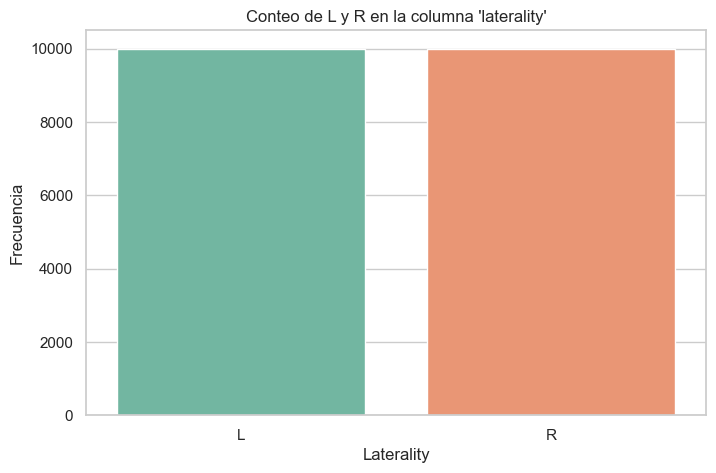

/var/folders/ds/4z7lc9ld4mqb377_3t2v4lxm0000gn/T/ipykernel_5154/2692154776.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=view_position_counts.index, y=view_position_counts.values, palette='Set2')


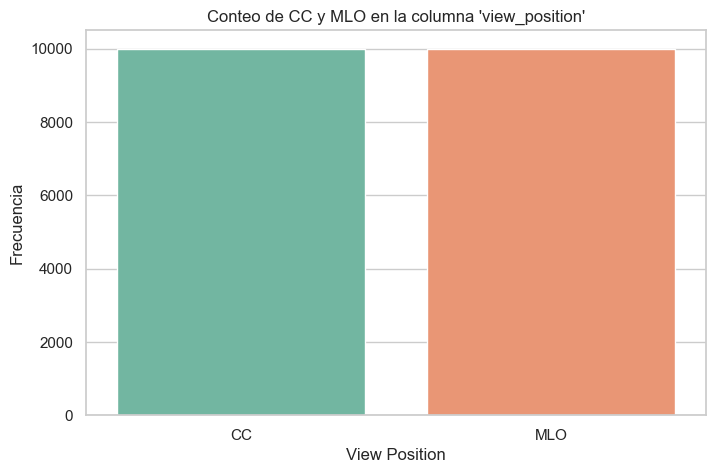

/var/folders/ds/4z7lc9ld4mqb377_3t2v4lxm0000gn/T/ipykernel_5154/2692154776.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=breast_density_counts.index, y=breast_density_counts.values, palette='Set2')


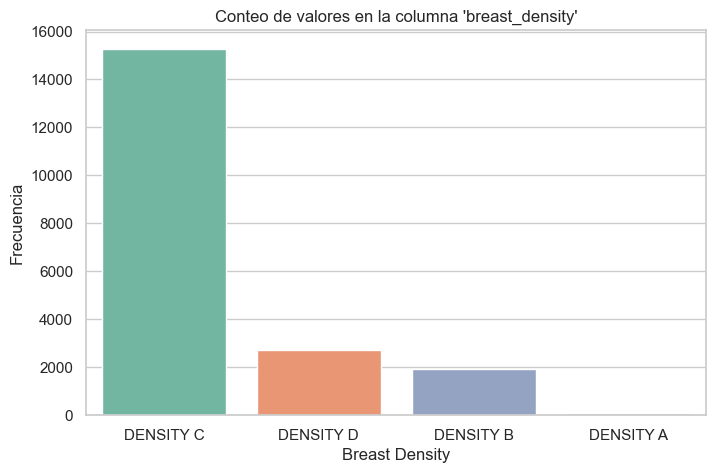

/var/folders/ds/4z7lc9ld4mqb377_3t2v4lxm0000gn/T/ipykernel_5154/2692154776.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=split_counts.index, y=split_counts.values, palette='Set2')


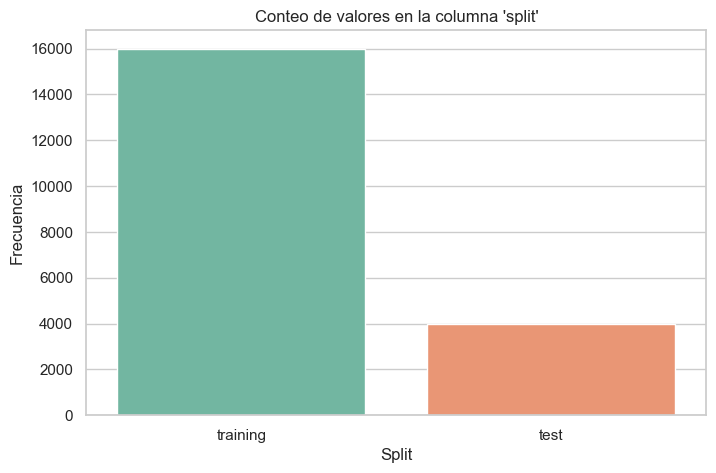

/var/folders/ds/4z7lc9ld4mqb377_3t2v4lxm0000gn/T/ipykernel_5154/2692154776.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=birads_counts.index, y=birads_counts.values, palette='Set2')


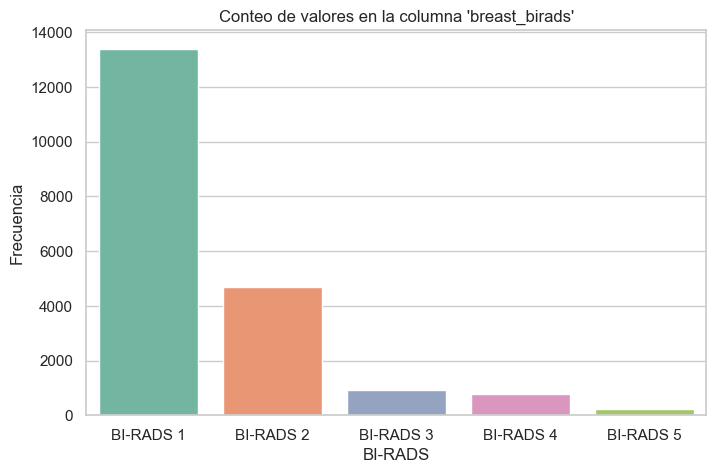

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar el Archivo CSV
ruta_csv = '/Volumes/m2/Memoria/Datasets/vindr/breast-level_annotations.csv'
annotations_df = pd.read_csv(ruta_csv)

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# 2. Conteo y gráfico de 'laterality' (Lado de la mama: L o R)
laterality_counts = annotations_df['laterality'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=laterality_counts.index, y=laterality_counts.values, palette='Set2')
plt.title("Conteo de L y R en la columna 'laterality'")
plt.xlabel("Laterality")
plt.ylabel("Frecuencia")
plt.show()

# 3. Conteo y gráfico de 'view_position' (Posición de la vista: CC o MLO)
view_position_counts = annotations_df['view_position'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=view_position_counts.index, y=view_position_counts.values, palette='Set2')
plt.title("Conteo de CC y MLO en la columna 'view_position'")
plt.xlabel("View Position")
plt.ylabel("Frecuencia")
plt.show()

# 4. Conteo y gráfico de 'breast_density' (Densidad mamaria: A, B, C, D)
breast_density_counts = annotations_df['breast_density'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=breast_density_counts.index, y=breast_density_counts.values, palette='Set2')
plt.title("Conteo de valores en la columna 'breast_density'")
plt.xlabel("Breast Density")
plt.ylabel("Frecuencia")
plt.show()

# 5. Conteo y gráfico de 'split' (División en conjunto de entrenamiento y prueba: training o test)
split_counts = annotations_df['split'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=split_counts.index, y=split_counts.values, palette='Set2')
plt.title("Conteo de valores en la columna 'split'")
plt.xlabel("Split")
plt.ylabel("Frecuencia")
plt.show()

# 6. Conteo y gráfico de 'breast_birads' (Categoría BI-RADS: 1, 2, 3, 4, 5, etc.)
birads_counts = annotations_df['breast_birads'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=birads_counts.index, y=birads_counts.values, palette='Set2')
plt.title("Conteo de valores en la columna 'breast_birads'")
plt.xlabel("BI-RADS")
plt.ylabel("Frecuencia")
plt.show()


### Finding_annotations.csv 

/var/folders/ds/4z7lc9ld4mqb377_3t2v4lxm0000gn/T/ipykernel_5154/3416389049.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=single_category_counts.index, y=single_category_counts.values, palette='Set2')


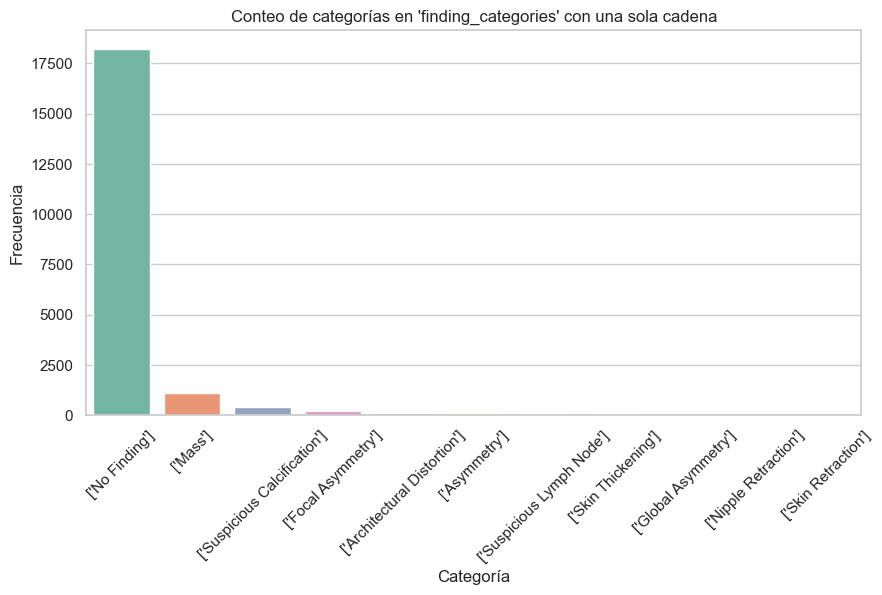

/var/folders/ds/4z7lc9ld4mqb377_3t2v4lxm0000gn/T/ipykernel_5154/3416389049.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=multiple_category_counts.index, y=multiple_category_counts.values, palette='Set2')


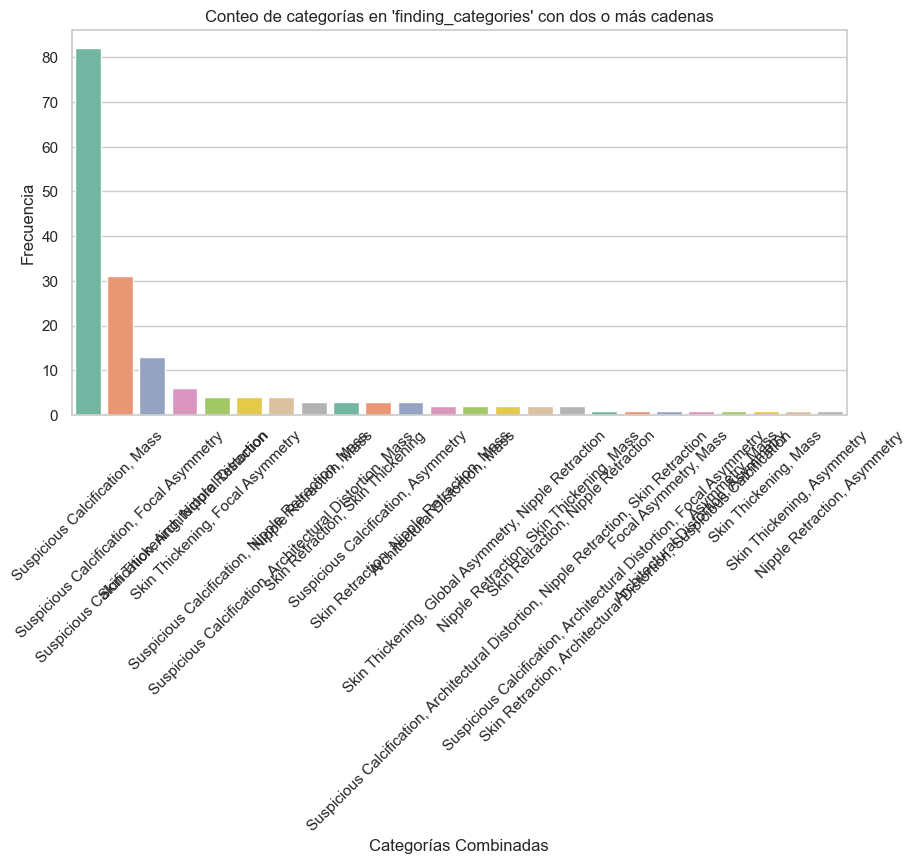

Total de filas con una sola categoría: 20312
Total de filas con dos o más categorías: 174


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar el Archivo CSV
ruta_csv = '/Volumes/m2/Memoria/Datasets/vindr/finding_annotations.csv'
annotations_df = pd.read_csv(ruta_csv)

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# 2. Contar los valores en la columna 'finding_categories'
# Contar cuántos tienen una cadena y cuántos tienen dos o más
annotations_df['num_categories'] = annotations_df['finding_categories'].apply(lambda x: len(eval(x)))

single_category = annotations_df[annotations_df['num_categories'] == 1]
multiple_categories = annotations_df[annotations_df['num_categories'] > 1]

# Conteo de categorías con una sola cadena
single_category_counts = single_category['finding_categories'].value_counts()

# Conteo de categorías con dos o más cadenas
multiple_category_counts = multiple_categories['finding_categories'].apply(lambda x: ', '.join(eval(x))).value_counts()

# 3. Visualización de los resultados

# Gráfico de categorías con una sola cadena
plt.figure(figsize=(10, 5))
sns.barplot(x=single_category_counts.index, y=single_category_counts.values, palette='Set2')
plt.title("Conteo de categorías en 'finding_categories' con una sola cadena")
plt.xlabel("Categoría")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.show()

# Gráfico de categorías con dos o más cadenas
plt.figure(figsize=(10, 5))
sns.barplot(x=multiple_category_counts.index, y=multiple_category_counts.values, palette='Set2')
plt.title("Conteo de categorías en 'finding_categories' con dos o más cadenas")
plt.xlabel("Categorías Combinadas")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.show()

# Conteo total de filas con una y dos o más categorías
single_category_count = len(single_category)
multiple_categories_count = len(multiple_categories)

print(f"Total de filas con una sola categoría: {single_category_count}")
print(f"Total de filas con dos o más categorías: {multiple_categories_count}")


/var/folders/ds/4z7lc9ld4mqb377_3t2v4lxm0000gn/T/ipykernel_5154/3177420208.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=single_category_counts.index, y=single_category_counts.values, palette='Set2')


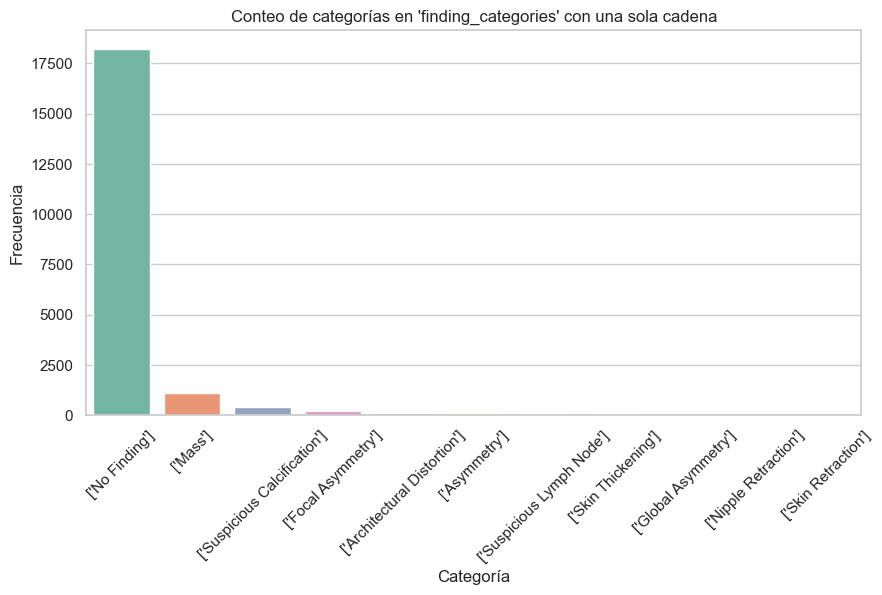

/var/folders/ds/4z7lc9ld4mqb377_3t2v4lxm0000gn/T/ipykernel_5154/3177420208.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=multiple_category_counts.index, y=multiple_category_counts.values, palette='Set2')


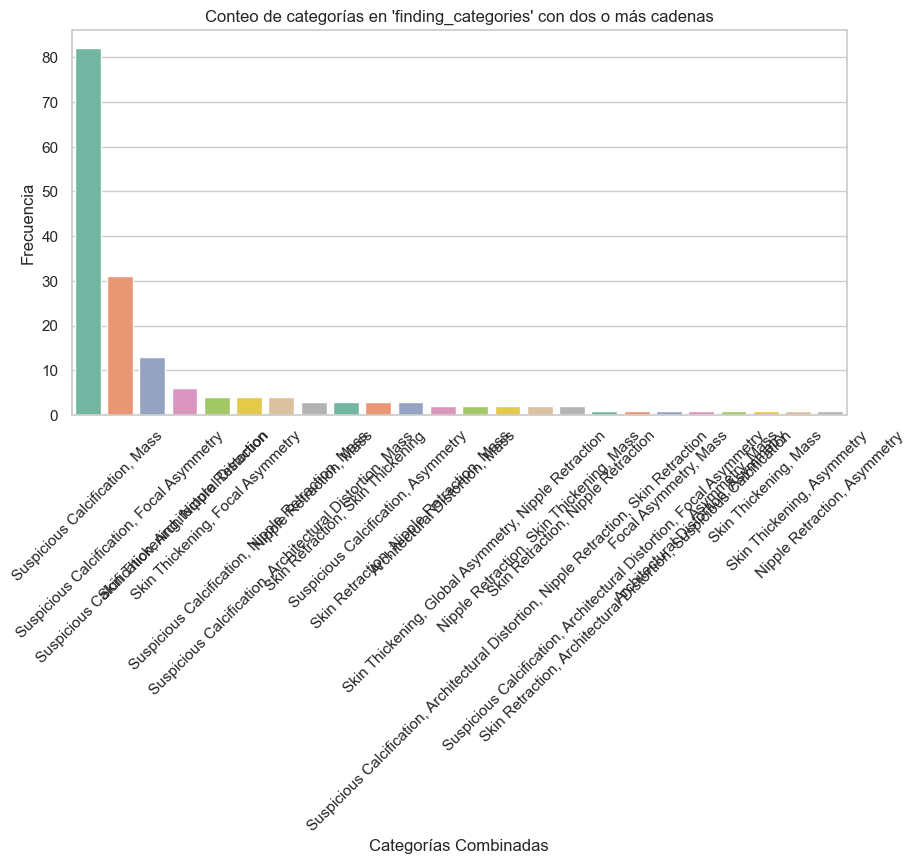

Total de filas con una sola categoría: 20312
Total de filas con dos o más categorías: 174

Conteo específico de categorías con una sola cadena:
['No Finding']: 18232
['Mass']: 1123
['Suspicious Calcification']: 402
['Focal Asymmetry']: 232
['Architectural Distortion']: 95
['Asymmetry']: 90
['Suspicious Lymph Node']: 57
['Skin Thickening']: 38
['Global Asymmetry']: 24
['Nipple Retraction']: 12
['Skin Retraction']: 7

Conteo específico de combinaciones de categorías con dos o más cadenas:
Suspicious Calcification, Mass: 82
Suspicious Calcification, Focal Asymmetry: 31
Suspicious Calcification, Architectural Distortion: 13
Skin Thickening, Nipple Retraction: 6
Skin Thickening, Focal Asymmetry: 4
Suspicious Calcification, Nipple Retraction, Mass: 4
Suspicious Calcification, Architectural Distortion, Mass: 4
Nipple Retraction, Mass: 3
Skin Retraction, Skin Thickening: 3
Suspicious Calcification, Asymmetry: 3
Skin Retraction, Nipple Retraction, Mass: 3
Architectural Distortion, Mass: 2
Skin 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar el Archivo CSV
ruta_csv = '/Volumes/m2/Memoria/Datasets/vindr/finding_annotations.csv'
annotations_df = pd.read_csv(ruta_csv)

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# 2. Contar los valores en la columna 'finding_categories'
# Contar cuántos tienen una cadena y cuántos tienen dos o más
annotations_df['num_categories'] = annotations_df['finding_categories'].apply(lambda x: len(eval(x)))

single_category = annotations_df[annotations_df['num_categories'] == 1]
multiple_categories = annotations_df[annotations_df['num_categories'] > 1]

# Conteo de categorías con una sola cadena
single_category_counts = single_category['finding_categories'].value_counts()

# Conteo de categorías con dos o más cadenas
multiple_category_counts = multiple_categories['finding_categories'].apply(lambda x: ', '.join(eval(x))).value_counts()

# 3. Visualización de los resultados

# Gráfico de categorías con una sola cadena
plt.figure(figsize=(10, 5))
sns.barplot(x=single_category_counts.index, y=single_category_counts.values, palette='Set2')
plt.title("Conteo de categorías en 'finding_categories' con una sola cadena")
plt.xlabel("Categoría")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.show()

# Gráfico de categorías con dos o más cadenas
plt.figure(figsize=(10, 5))
sns.barplot(x=multiple_category_counts.index, y=multiple_category_counts.values, palette='Set2')
plt.title("Conteo de categorías en 'finding_categories' con dos o más cadenas")
plt.xlabel("Categorías Combinadas")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.show()

# Conteo total de filas con una y dos o más categorías
single_category_count = len(single_category)
multiple_categories_count = len(multiple_categories)

print(f"Total de filas con una sola categoría: {single_category_count}")
print(f"Total de filas con dos o más categorías: {multiple_categories_count}")

# 4. Printear la cantidad específica de cada categoría en 'finding_categories'

print("\nConteo específico de categorías con una sola cadena:")
for category, count in single_category_counts.items():
    print(f"{category}: {count}")

print("\nConteo específico de combinaciones de categorías con dos o más cadenas:")
for category, count in multiple_category_counts.items():
    print(f"{category}: {count}")
